In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(["PassengerId","Survived","Name","Ticket","Cabin"],axis=1)
y = titanic_data.Survived

In [5]:
X = pd.get_dummies(X)
X = X.fillna({"Age":X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

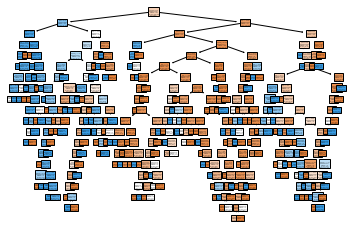

In [7]:
clf.fit(X,y)
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape

(596, 10)

In [10]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9798657718120806

In [11]:
clf.score(X_test,y_test)

0.7796610169491526

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8238255033557047

In [13]:
clf.score(X_test,y_test)

0.8203389830508474

In [14]:
scores_data = pd.DataFrame()

In [15]:
max_depth_value = range(1,100)

In [16]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score],
         "cross_val_score": [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [17]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


In [18]:
scores_data_long = pd.melt(scores_data,
                                    id_vars=["max_depth"],
                                    value_vars=["train_score", "test_score", "cross_val_score"],
                                    var_name="set_type",
                                    value_name="score")

In [19]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [20]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.802059
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.800350
207,10,cross_val_score,0.800350


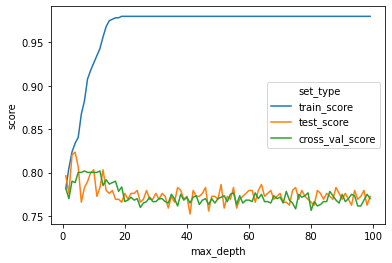

In [21]:
sns.lineplot(x = "max_depth", y = "score", hue = "set_type",data = scores_data_long)

In [22]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7864406779661017

In [23]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
paramters = {'criterion': ['gini','entropy'], 'max_depth' : range(1,30)}

In [24]:
grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=paramters, cv=5)

In [25]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [26]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [27]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.7661016949152543

In [28]:
from sklearn.metrics import precision_score

In [29]:
y_pred = best_clf.predict(X_test)

In [30]:
precision_score(y_true=y_test, y_pred=y_pred)

0.7931034482758621

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(y_true=y_test, y_pred=y_pred)

0.575

In [33]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

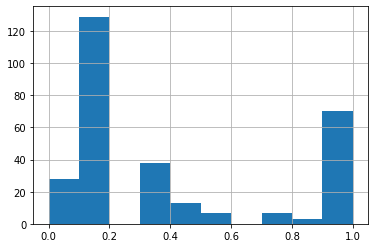

In [34]:
pd.Series(y_predicted_prob[:,1]).hist()

In [35]:
y_preda = np.where(y_predicted_prob[:,1]>0.8, 1, 0)
y_preda

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [36]:
precision_score(y_test,y_preda)

0.8493150684931506

In [37]:
recall_score(y_test, y_pred)

0.575

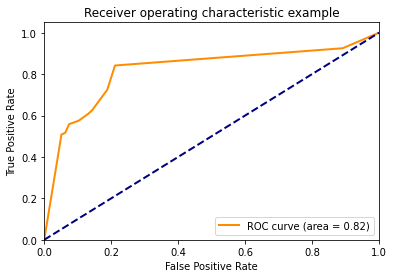

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
lw= 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()